In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


X = np.array([[4, 2.9], [4, 4], [1, 2.5], [2.5, 1], [4.9, 4.5], [1.9, 1.9], [3.5, 4], [0.5, 1.5], [2, 2.1], [4.5, 2.5]], dtype=np.float32)
y = np.array([1, 1, -1, -1, 1, -1, 1, -1, -1, 1], dtype=np.int8)
alpha = np.array([0.414, 0, 0, 0.018, 0, 0, 0.018, 0, 0.414, 0], dtype=np.float32)

In [2]:
W = np.multiply(X, (y * alpha).reshape((-1, 1))).sum(axis=0)
b = np.average(y - np.dot(X, W))
print(f'W: {W}, b: {b}')

W: [0.846      0.38520008], b: -3.472668170928955


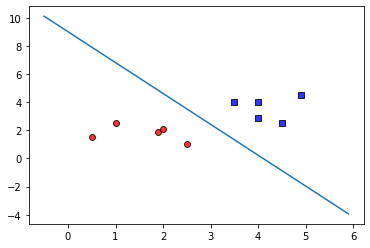

In [4]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
resolution=0.2
x1 = np.arange(x1_min, x1_max, resolution)
x2 = (-b - W[0] * x1) / W[1]
plt.plot(x1, x2)
markers = ('o', 's', '^', 'v', '<')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

In [7]:
def hyperplane(Xs):
    return np.dot(Xs, W) + b

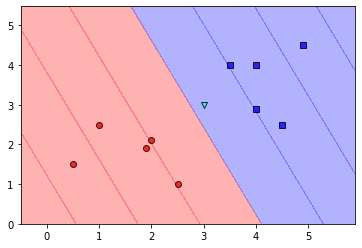

In [14]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
resolution=0.02
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
markers = ('o', 's', '^', 'v', '<')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
lab = hyperplane(np.array([xx1.ravel(), xx2.ravel()]).T)
lab = lab.reshape(xx1.shape)
plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
        
plt.scatter(x=3.0, 
            y=3.0,
            alpha=0.8, 
            c='cyan',
            marker='v', 
            label=f'Class {cl}', 
            edgecolor='black')

In [9]:
from numpy import linalg as LA

print(f'x[3]: {X[3]}, x[5]: {X[5]}, x[8]: {X[8]}')

dist_3 = hyperplane(X[3]) / LA.norm(W)
dist_5 = hyperplane(X[5]) / LA.norm(W)
dist_8 = hyperplane(X[8]) / LA.norm(W)
print(f'dist_3_sv: {dist_3}, dist_5: {dist_5}, dist_8_sv: {dist_8}')

x[3]: [2.5 1. ], x[5]: [1.9 1.9], x[8]: [2.  2.1]
dist_3_sv: -1.0461515188217163, dist_5: -1.219264268875122, dist_8_sv: -1.0453767776489258


In [11]:
def predict(x_test):
    if hyperplane(x_test) > 0:
        return 1;
    return -1

predict(np.array([3, 3]))

1

In [12]:
hyperplane(np.array([3.0, 3.0])) / LA.norm(W)

0.23767204347855916